In [1]:
from pie_data import PIE
import numpy as np


In [2]:
pie_path = './'
pie = PIE(data_path=pie_path)

In [3]:
# par = {'fstride':10}
traj_sec_train = pie.generate_data_trajectory_sequence("train")
traj_sec_val = pie.generate_data_trajectory_sequence("val")
traj_sec_test = pie.generate_data_trajectory_sequence("test")

---------------------------------------------------------
Generating trajectory sequence data
fstride: 1
sample_type: all
height_rng: [0, inf]
squarify_ratio: 0
data_split_type: default
seq_type: intention
min_track_size: 15
random_params: {'ratios': None, 'val_data': True, 'regen_data': False}
kfold_params: {'num_folds': 5, 'fold': 1}
---------------------------------------------------------
Generating database for pie
pie annotations loaded from /mnt/esperanto/et/intern/hamidreza/PIE/data_cache/pie_database.pkl
---------------------------------------------------------
Generating intention data
Subset: train
Number of pedestrians: 880 
Total number of samples: 878 
---------------------------------------------------------
Generating trajectory sequence data
fstride: 1
sample_type: all
height_rng: [0, inf]
squarify_ratio: 0
data_split_type: default
seq_type: intention
min_track_size: 15
random_params: {'ratios': None, 'val_data': True, 'regen_data': False}
kfold_params: {'num_folds': 5

In [6]:
len(traj_sec_test['ped_id'][0])

76

In [5]:
len(traj_sec_train['image'][0])

94

In [17]:
ped_dict = pie._get_ped_attributes('set01', 'video_0001')
vehicle_dict = pie._get_vehicle_attributes('set01', 'video_0001')


In [18]:
ped_dict['1_1_7']

{'age': 2,
 'critical_point': 1595,
 'crossing': 0,
 'crossing_point': 1613,
 'exp_start_point': 1568,
 'gender': 2,
 'intention_prob': 0.8666666667,
 'intersection': 3,
 'num_lanes': 4,
 'signalized': 0,
 'traffic_direction': 1}

In [1]:
# traj_sec_val['bbox'][0]

In [40]:
# iterate over pedestrains in train, val, and test sets
# find exposure start frame and crossing point frame
# down sample to whatever number that is appropriate
# slice the frame images for further processing
# gather all information from annotation files about the objects (ped, env, ego-vehicle)

# 1. Test with llava-next or video-llava first and check the results
# 2. generate the fine tuning dataset and then fine tune and test the ft model on the test data
# np.save('./hamidreza_files/clip.npy', clip)

In [5]:
# generating train, val, and test clips for fine tuning (saving in .npy format for videos)
# Note1: resizing the frames in half size
# Note2: down sampling to 8 for less compute heavy operations 
from tqdm import tqdm
from PIL import Image, ImageDraw
def save_npy_clips(traj_sec_dict, save_dir, down_samp_size):
    
    # keys are: dict_keys(['image', 'bbox', 'occlusion', 'intention_prob', 'intention_binary', 'ped_id'])
    images = traj_sec_dict['image']
    pedestrians = traj_sec_dict['ped_id']
    bbox_all = traj_sec_dict['bbox']
    for i in tqdm(range(len(images))):
        cur_image_file_list = images[i]
        cur_ped_id = pedestrians[i][0][0]
        
        # adding the bbox in the frame instead of text prompt
        cur_bbox_list = bbox_all[i]

        clip = []
        for j, f in enumerate(cur_image_file_list):
            cur_bbox = cur_bbox_list[j]
            image = Image.open(f)
            draw = ImageDraw.Draw(image)
            draw.rectangle(cur_bbox, outline='red', width=3)
            # Resize the image
            # new_size = (960, 540) 
            # new_size = (672, 672) 
            # resized_image = image.resize(new_size, Image.LANCZOS)
            # image_array = np.array(resized_image)
            clip.append(image)
        
        # down-sampling 
        total_frames = len(clip)
        indices = np.arange(0, total_frames, total_frames / down_samp_size).astype(int)
        clip = np.array(clip)
        clip = clip[indices]

        # saving the np array with ped_id as file name
        file_name = cur_ped_id
        np.save(save_dir + file_name, clip)

In [7]:
# save_npy_clips(traj_sec_train, './hamidreza_files/dataset_new_16frames/original/train_clips/', 16)
# save_npy_clips(traj_sec_test, './hamidreza_files/dataset_new_16frames/original/test_clips/', 16)
# save_npy_clips(traj_sec_val, './hamidreza_files/dataset_new_16frames/val_clips/', 16)

100%|██████████| 714/714 [47:19<00:00,  3.98s/it]  


In [ ]:
# data augmentation
# 1- gaussian noise
# 2- flipping horizontally
# 3- grid distortion (potential issue with pixel mirorring and object duplication)
# 4- perspective wrap (trapezoidal effect)
# 5- brightness noise
# 5- blurred noise

## Data Augmentation

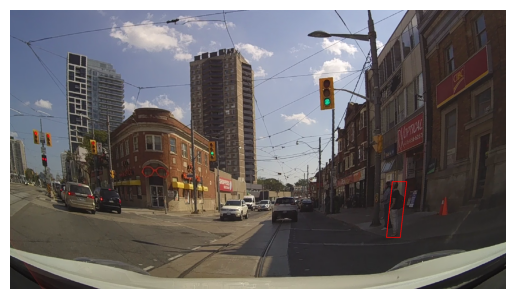

Error: no "view" rule for type "image/png" passed its test case
       (for more information, add "--debug=1" on the command line)
Loading "original-fs" failed
Error: Cannot find module 'original-fs'
Require stack:
- /home/alikhani/.vscode-server/cli/servers/Stable-eaa41d57266683296de7d118f574d0c2652e1fc4/server/out/server-cli.js
    at Module._resolveFilename (node:internal/modules/cjs/loader:1145:15)
    at Module._load (node:internal/modules/cjs/loader:986:27)
    at Module.require (node:internal/modules/cjs/loader:1233:19)
    at require (node:internal/modules/helpers:179:18)
    at i (/home/alikhani/.vscode-server/cli/servers/Stable-eaa41d57266683296de7d118f574d0c2652e1fc4/server/out/server-cli.js:3:98)
    at r.load (/home/alikhani/.vscode-server/cli/servers/Stable-eaa41d57266683296de7d118f574d0c2652e1fc4/server/out/server-cli.js:2:1637)
    at h.load (/home/alikhani/.vscode-server/cli/servers/Stable-eaa41d57266683296de7d118f574d0c2652e1fc4/server/out/server-cli.js:1:13958)
    a

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the numpy array from the .npy file
image_array = np.load('./hamidreza_files/dataset_new_16frames/warp/train_clips/1_1_1.npy')[3]

# Display the image using matplotlib
plt.imshow(image_array)  # Use 'gray' for grayscale images, or remove cmap for RGB images
plt.axis('off')  # Hide axes
plt.show()

# Optionally, display using PIL
# If the image array is in the correct format (e.g., 2D for grayscale or 3D for RGB), you can display it directly
image = Image.fromarray(image_array)

# Show the image using PIL
image.show()


In [8]:
import cv2
import glob

# Get list of images
image_files = sorted(glob.glob("image_*.png"))

# Define video properties
frame = cv2.imread(image_files[0])
height, width, layers = frame.shape
video = cv2.VideoWriter('video.avi', cv2.VideoWriter_fourcc(*'DIVX'), 1, (width, height))

# Create the video by adding each image
for image_file in image_files:
    img = cv2.imread(image_file)
    video.write(img)

# Release the video writer
cv2.destroyAllWindows()
video.release()

[['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1'], ['1_1_1']

In [12]:
image_list = traj_sec_train['image'][1]
image_list

['./images/set01/video_0001/16332.png',
 './images/set01/video_0001/16333.png',
 './images/set01/video_0001/16334.png',
 './images/set01/video_0001/16335.png',
 './images/set01/video_0001/16336.png',
 './images/set01/video_0001/16337.png',
 './images/set01/video_0001/16338.png',
 './images/set01/video_0001/16339.png',
 './images/set01/video_0001/16340.png',
 './images/set01/video_0001/16341.png',
 './images/set01/video_0001/16342.png',
 './images/set01/video_0001/16343.png',
 './images/set01/video_0001/16344.png',
 './images/set01/video_0001/16345.png',
 './images/set01/video_0001/16346.png',
 './images/set01/video_0001/16347.png',
 './images/set01/video_0001/16348.png',
 './images/set01/video_0001/16349.png',
 './images/set01/video_0001/16350.png',
 './images/set01/video_0001/16351.png',
 './images/set01/video_0001/16352.png',
 './images/set01/video_0001/16353.png',
 './images/set01/video_0001/16354.png',
 './images/set01/video_0001/16355.png',
 './images/set01/video_0001/16356.png',


In [70]:
x['ped_annotations']['1_1_1']['behavior'].keys()

dict_keys(['gesture', 'look', 'action', 'cross'])

In [37]:
x['1_1_1']

{'age': 2,
 'critical_point': 1111,
 'crossing': 0,
 'crossing_point': 1133,
 'exp_start_point': 1018,
 'gender': 1,
 'intention_prob': 0.9666666667,
 'intersection': 4,
 'num_lanes': 4,
 'signalized': 3,
 'traffic_direction': 1}

In [6]:
def get_set_vid_id_str(ped_id_str):
    set_id_str_prefix = 'set0'
    vid_id_str_prefix = 'video_00'
    set_id, vid_id, ped_id = ped_id_str.split('_')

    set_id_str = set_id_str_prefix + set_id

    if len(vid_id) == 1:
        vid_id_str = vid_id_str_prefix + '0' + vid_id
    else:
        vid_id_str = vid_id_str_prefix + vid_id
    
    return set_id_str, vid_id_str

action_id_to_text_dict =  {0: 'standing', 1: 'walking'}
look_id_to_text_dict =  {0: 'not-looking', 1: 'looking'}
gesture_id_to_text_dict = {0: '__undefined__', 1: 'hand_ack', 2: 'hand_yield', 3: 'hand_rightofway', 4: 'nod', 5: 'other'}


In [16]:
# generating pedestrian dict for train, test, and val subsets with more informatin 
from tqdm import tqdm
def get_ped_info_dict(traj_sec_dict):
    ped_info_dict = dict()
    for i in tqdm(range(len(traj_sec_dict['intention_prob']))):
        ped_id = traj_sec_dict['ped_id'][i][0][0]
        ped_bbox_list = np.array(traj_sec_dict['bbox'][i])
        # scaling the bbox to new height and width that is used for training (960, 540) 
        scaling_factor = 0.5
        ped_bbox_list = ped_bbox_list*scaling_factor
        ped_bbox_list = ped_bbox_list.tolist()

        # getting pedestrian behavior information 
        set_id_str, vid_id_str = get_set_vid_id_str(ped_id)
        ped_behavior_dict = pie._get_annotations(set_id_str, vid_id_str)['ped_annotations'][ped_id]['behavior']
        gesture_list = ped_behavior_dict['gesture']
        look_list = ped_behavior_dict['look']
        action_list = ped_behavior_dict['action']
        
        avg_gesture = gesture_id_to_text_dict[round(np.mean(np.array(gesture_list)))]
        avg_look = look_id_to_text_dict[round(np.mean(np.array(look_list)))]
        avg_action = action_id_to_text_dict[round(np.mean(np.array(action_list)))]

        # print(ped_id)
        int_prob_list = traj_sec_dict['intention_prob'][i]
        int_bin_list = traj_sec_dict['intention_binary'][i]

        avg_int_prob = np.mean(np.array(int_prob_list))
        avg_int_bin = np.mean(np.array(int_bin_list))

        ped_info_dict[ped_id] = {'intention_prob': avg_int_prob, 'action_binary': avg_int_bin, 
                            'ped_bbox_list': ped_bbox_list, 'avg_gesture': avg_gesture, 
                            'avg_look': avg_look, 'avg_action': avg_action}
        
    return ped_info_dict

In [8]:
ped_info_dict_train = get_ped_info_dict(traj_sec_train)
ped_info_dict_test = get_ped_info_dict(traj_sec_test)
ped_info_dict_val = get_ped_info_dict(traj_sec_val)

100%|██████████| 243/243 [03:34<00:00,  1.13it/s]


In [12]:
import json

def get_llavaNextVideo_perf(pred_json_dir, ped_dir):
    with open(pred_json_dir, 'r') as json_file:
        pred_dict = json.load(json_file)

    with open(ped_dir, 'r') as json_file:
        ped_intention_action_dict = json.load(json_file)
    print(len(pred_dict))
    print(len(ped_intention_action_dict))
    count = 0
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for k, v in pred_dict.items():
        gt_intention_prob = ped_intention_action_dict[k][0]
        gt_intention_action = ped_intention_action_dict[k][1]

        pred_prob = v[1]
        pred_action = v[0]

        # if 'Yes' in pred_action and int(gt_intention_action) == 1:
        #     count += 1
        # if 'No' in pred_action and int(gt_intention_action) == 0:
        #     count += 1
        # true positive
        if 'Yes' in pred_action and int(gt_intention_action) == 1:
            tp += 1
            count += 1
        
        # false positive
        if 'Yes' in pred_action and int(gt_intention_action) == 0:
            fp += 1
        
        # true negative
        if 'No' in pred_action and int(gt_intention_action) == 0:
            tn += 1
            count += 1

        # false negative
        if 'No' in pred_action and int(gt_intention_action) == 1:
            fn += 1
    precision = tp/(tp + fp)
    recall = tp/(tp + fn)
    f1 = 2*precision*recall/(precision + recall)
    print('F1 score: ' + str(f1))
    print(count/len(pred_dict))
        

In [2]:
# get_llavaNextVideo_perf('hamidreza_files/llavaNext_answers_train_clips.json', 'hamidreza_files/ped_train_dict.json')